## Study of Co2 and Ch4 trends:

In this project, we analyse greenhouse gas data from [Global Monitoring Laboratory (GML) of the National Oceanic and Atmospheric Administration (NOAA)](https://gml.noaa.gov/ccgg/trends_ch4/). Using Co2 and Ch4 data available on th GML website, We examine the long-term trends and patterns of these gases over the years.

### 1. Read the data

In [1]:
import csv

def read_data(filename:str, field:list):
    data = []
    with open(filename) as f:
        #Skip data starts with # because the data isn't exact csv format on their initial lines.
        f_csv = [line for line in f if line[0] != "#"]
        reader = csv.DictReader(f_csv, skipinitialspace=True, delimiter = ' ', fieldnames=field)
        data = [line for line in reader]

    return data

In [2]:
co2_field = ["year", "month", "decimal_date", "monthly_average", "de_seasonalized", "days", "std_dev_of_days", "unc_of_mon_mean"]
co2_data = read_data("./data/co2_monthly.csv", co2_field)

ch4_field = ["year", "month", "decimal", "average", "average_unc", "trend", "trend_unc"]
ch4_data = read_data("./data/ch4_monthly.csv", ch4_field)

In [3]:
print("Co2 DATA :-")
print(co2_data[0])
print()
print("Ch4 DATA :-")
print(ch4_data[0])
print()

Co2 DATA :-
{'year': '1958', 'month': '3', 'decimal_date': '1958.2027', 'monthly_average': '315.71', 'de_seasonalized': '314.44', 'days': '-1', 'std_dev_of_days': '-9.99', 'unc_of_mon_mean': '-0.99'}

Ch4 DATA :-
{'year': '1983', 'month': '7', 'decimal': '1983.542', 'average': '1625.98', 'average_unc': '2.39', 'trend': '1635.09', 'trend_unc': '1.46'}



### 2. Simplify the data : -


Since Co2 and Ch4 contains numerous fields, we aim to extract only relevant ones for our analysis. The selected fields for each dataset are as follows:-
* Co2 - "year", "month", "monthly_average"
* Ch4 - "year", "month", "average"

After selecting the relevant fields from the Co2 and Ch4 datasets, the columns **monthly_average** and **average** are renamed to **co2_concentration** and **ch4_concentration**, respectively for improved clarity and consistency in analysis.

In [4]:
def extract_selected_field(data:list, selected_field:list):
    return [{key:val for key,val in row.items() if key in selected_field} for row in data]

In [5]:
co2_extract = extract_selected_field(co2_data, ["year", "month", "monthly_average"])
print("Extracted Co2 : ", co2_extract[0])
print()
ch4_extract = extract_selected_field(ch4_data, ["year", "month", "average"])
print("Extracted Ch4 : ", ch4_extract[0])

Extracted Co2 :  {'year': '1958', 'month': '3', 'monthly_average': '315.71'}

Extracted Ch4 :  {'year': '1983', 'month': '7', 'average': '1625.98'}


In [6]:
def rename(data:dict, field:dict):
    renamed_data = dict()
    for key, val in data.items():
        if key in field.keys():
            renamed_data[field[key]]= val
        else:
            renamed_data[key] = val
    return renamed_data
    
def rename_field(data:list, renamed_field:dict):
    return [rename(row, renamed_field) for row in data]

In [7]:
co2_simplified = rename_field(co2_extract, {"monthly_average":"co2_concentration"})
print("Simplified Co2 : ", co2_simplified[0])
print()

ch4_simplified = rename_field(ch4_extract, {"average": "ch4_concentration"})
print("Simplifed Ch4 : ", ch4_simplified[0])

Simplified Co2 :  {'year': '1958', 'month': '3', 'co2_concentration': '315.71'}

Simplifed Ch4 :  {'year': '1983', 'month': '7', 'ch4_concentration': '1625.98'}


### 3.1 Fixing the data types

Since the data types of the simplifed data of Co2 and Ch4 datasets are all represented in the String format, we need to convert to each field to their respective data types such as year, month to **int** type meanwhile co2_concentration and ch4_concentration to **float** types.

Since the simplifed Co2 and Ch4 datasets have all fields represented as string, it is necessary to convert them to their appropriate data types. Specifically, the **year** and **month** fields are converted to **integer(int)**, while the **co2_concentration** and **ch4_concentration** fields are converted to **floating-point(float)** numbers.

In [8]:
# WRITE SOLUTION HERE
def fix_data_types(data:list, field_types:dict):
    return [ {key:field_types[key](val) for key,val in row.items()} for row in data]

In [9]:
co2_fixed = fix_data_types(co2_simplified, {"year":int, "month":int, "co2_concentration":float})
print("Fixed data types of Co2 : ", co2_fixed[0])
print()

ch4_fixed = fix_data_types(ch4_simplified, {"year":int, "month":int, "ch4_concentration":float})
print("Fixed data types of Ch4 : ", ch4_fixed[0])

Fixed data types of Co2 :  {'year': 1958, 'month': 3, 'co2_concentration': 315.71}

Fixed data types of Ch4 :  {'year': 1983, 'month': 7, 'ch4_concentration': 1625.98}


### 3.2 Fixing the units

Since the concentration units of Co2 and Ch4 differ - Co2 is measured in **parts per million (ppm)**, meanwhile Ch4 measured in **parts per billion (ppb)** - it is necessary to convert both datasets to the same unit, expressed in ppm, for consistent analysis and further processing.

In [10]:
def ppb_ppm(row:dict):
    row['ch4_concentration'] = row['ch4_concentration']/1000
    return row
    
def convert_ch4_concentration_to_ppm(data):
    return [ppb_ppm(row) for row in data]

In [11]:
ch4_ppm = convert_ch4_concentration_to_ppm(ch4_fixed)
print("Fixed units of Ch4 : ", ch4_ppm[0])

Fixed units of Ch4 :  {'year': 1983, 'month': 7, 'ch4_concentration': 1.62598}


### 4. Combining the data
Next, We combine the two datasets to a create a single datatset containing the fields **year**, **month**, **co2_concentration** and **ch4_concentration**.

In [37]:
def join_data(co2_data:list, ch4_data:list):
    ch4_better_key = { (row['year'], row['month']): row['ch4_concentration']  for row in ch4_data}
    output = []
    for co2_row in co2_data:
        index = (co2_row['year'], co2_row['month'])
        if index in ch4_better_key:
            co2_row['ch4_concentration'] = ch4_better_key[index]
            output.append(co2_row)
    return output

In [38]:
greenhouse_gas = join_data(co2_fixed, ch4_ppm)
print("Greenhouse gas : ", greenhouse_gas[0])

Greenhouse gas :  {'year': 1983, 'month': 7, 'co2_concentration': 344.32, 'ch4_concentration': 1.62598, 'co2e': 392.6585}


### 5. Processing the data

As we have combined the greenhouse gases into a single dataset based on matching year and month,  we are now interested in determining the total warming effect of these gases using their **Global Warming Potential(GWP)** values. 

The GWP is a metric that quantifies the total warming effect of a greenhouse gas relative to carbon dioxide (CO₂) over a specific time period. By definition, the GWP of co2 is 1, while the GWP of ch4 is 25. Using these values, the total warming effect of CH₄ can be expressed in terms of CO₂ equivalent (CO₂e) concentration by multiplying its concentration by 25.

In [39]:
def add_co2e(data):
    for row in data:
        row['co2e'] = row['co2_concentration'] + (25 * row['ch4_concentration'])
    return data

In [40]:
co2e_data = add_co2e(greenhouse_gas)
print("Co2 equivalent gases : ", co2e_data[0])

Co2 equivalent gases :  {'year': 1983, 'month': 7, 'co2_concentration': 344.32, 'ch4_concentration': 1.62598, 'co2e': 384.9695}


### 6. Plotting the data

We are now ready to plot the data. We want to see Co2e concentration over time.

In [44]:
def get_decimal_year(yr, mon):
    return yr + ((mon-1)/12)

def add_decimal_year(data):
    for row in data:
        row['decimal_year'] = get_decimal_year(row['year'], row['month'])
    return data

In [46]:
co2e_data = add_decimal_year(co2e_data)
print("Co2 equivalent gases with its decimal year ")
print(co2e_data[0])

Co2 equivalent gases with its decimal year 
{'year': 1983, 'month': 7, 'co2_concentration': 344.32, 'ch4_concentration': 1.62598, 'co2e': 384.9695, 'decimal_year': 1983.5}


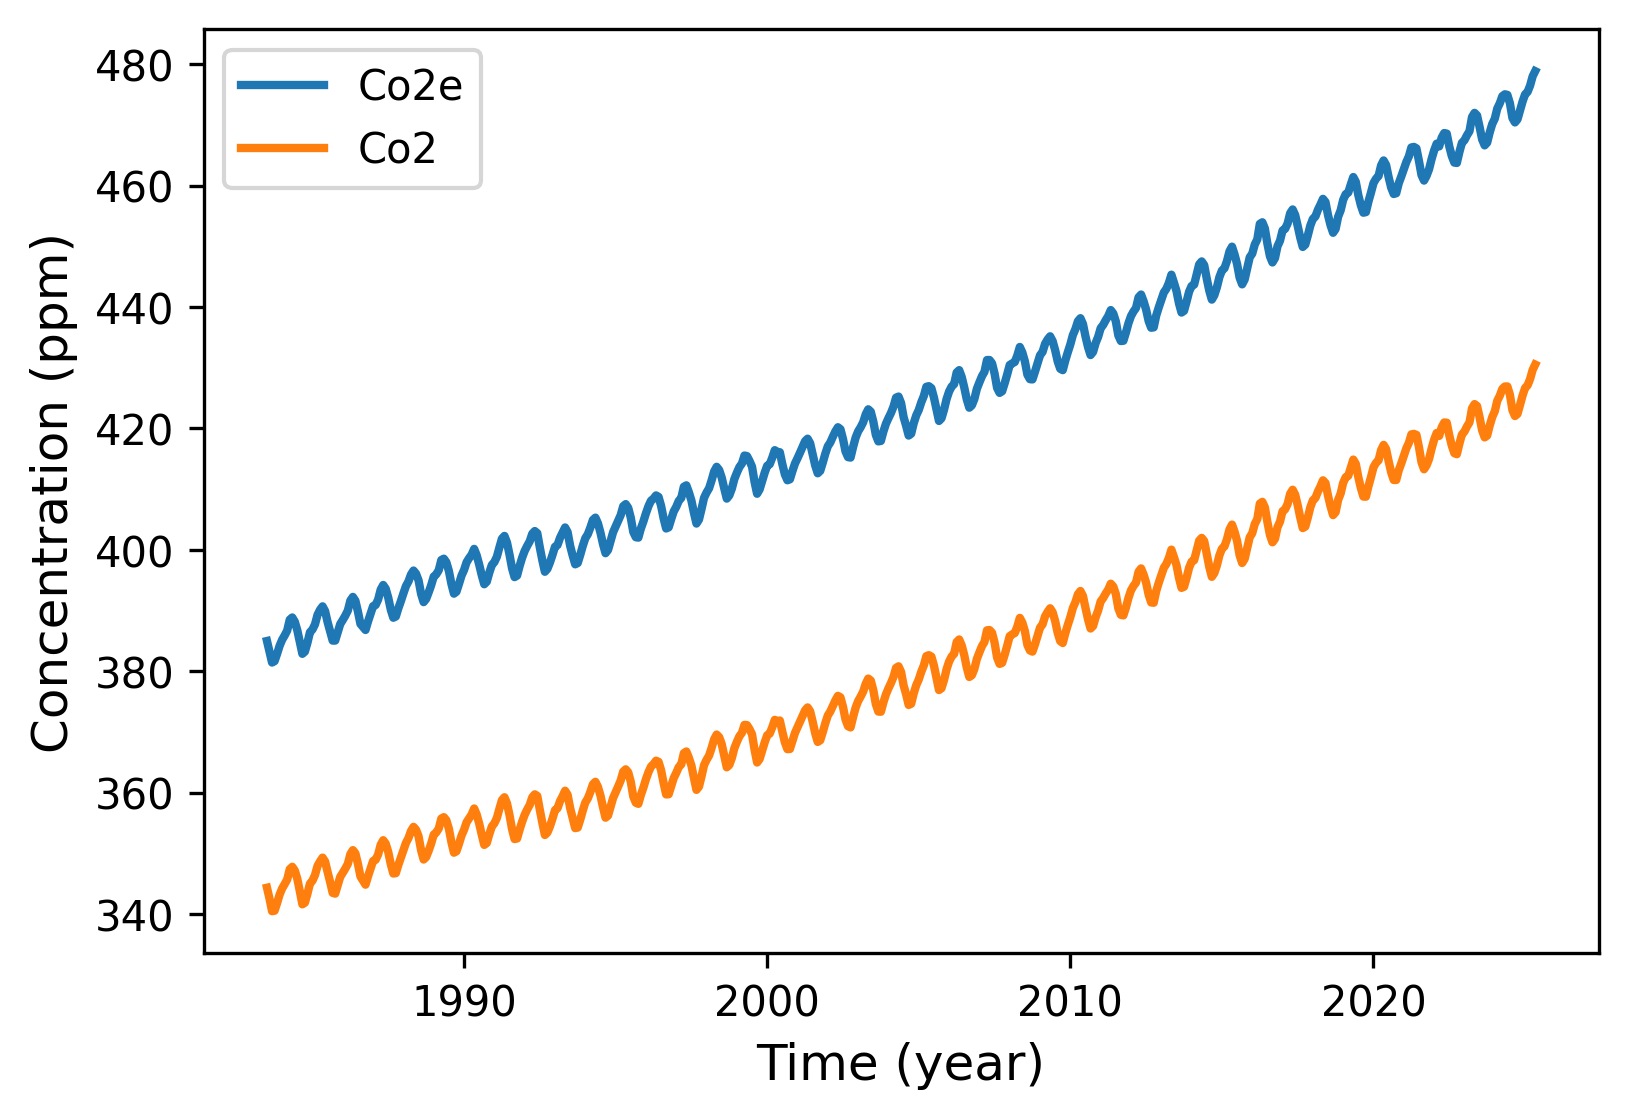

In [67]:
import matplotlib.pyplot as plt

plt.rcParams.update(
        {
            "figure.figsize": (6, 4),
            "font.size": 12,
            "lines.linewidth": 2,
            "lines.markersize": 6,
            "axes.labelsize": 12,
            "axes.titlesize": 12,
            "xtick.labelsize": 10,
            "ytick.labelsize": 10,
            "legend.fontsize": 10,
            "figure.dpi": 300,
        }
)

f = plt.figure()

plt.plot([row['decimal_year'] for row in co2e_data],[row['co2e'] for row in co2e_data], label="Co2e")
plt.plot([row['decimal_year'] for row in co2e_data],[row['co2_concentration'] for row in co2e_data], label = "Co2")
plt.xlabel("Time (year)")
plt.ylabel("Concentration (ppm)")
plt.legend()
plt.show()
f.savefig("./images/Co2e_vs_Co2.pdf")

### 7. Conclusion
From the plot, it is evident that **Co2e** increases steadily over the year with a relatively constant rate. Currently, the **Ch4** contribution to the total **Co2e** is minimal. In future analyses, we aim to analyse this periodic variations in **Co2e** to gain deeper insights into the factors driving these fluctuations.

In [63]:
with open('./data/Co2e_monthly.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    w = csv.DictWriter(f, co2e_data[0].keys())
    w.writeheader()
    for row in co2e_data:
        w.writerow(row)